## Introduction

Dataset includes information about books such as author, book average rating (taken form goodreads), rating count, publication date.

The aim of the analysis is to represent main influences to book rating.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('books.csv')

In [3]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652.0,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870.0,2153167,29221,9 01 2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352.0,6333,244,11 01 2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435.0,2339585,36325,5 01 2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690.0,41428,164,9/13/2004,Scholastic


### Data cleaning

In [4]:
# nereikalingu stulpeliu pasalinimas
del df['isbn']
del df['isbn13']

In [5]:
print(df. columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [6]:
# pervadinam stulpelio pavadinima - pasalinant nereikalinga tarpa:
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

In [7]:
# check:
print(df. columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')


In [8]:
# Datos stulpelio formatavimas
df['publication_date'] = df['publication_date'].str.replace('/','-')
df['publication_date'] = df['publication_date'].str.replace(' ','-')

In [9]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['year'] =  df.publication_date.dt.year.astype('Int64')
df['month'] =  df.publication_date.dt.month.astype('Int64')

In [10]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [11]:
# kalbos pakeitimas i eng 
df['language_code']= df['language_code'].replace(['en-US', 'en-GB', 'en-CA'],'eng')

In [12]:
df['language_code'].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara',
       'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg',
       'wel', 'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

In [13]:
df.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                    float64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
year                           Int64
month                          Int64
dtype: object

In [14]:
df.head(3)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690,27591,2006-09-16,Scholastic Inc.,2006,9
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167,29221,2004-09-01,Scholastic Inc.,2004,9
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333,244,2003-11-01,Scholastic,2003,11


In [15]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
year                  2
month                 2
dtype: int64

## Basic analysis

In [16]:
df.describe().round(2)

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,year,month
count,11127.00,11127.00,11127.00,11127.00,11127.00,11125.00,11125.00
mean,21310.94,3.93,336.38,17936.41,541.85,2000.17,6.55
std,13093.36,0.35,241.13,112479.44,2576.18,8.25,3.41
min,1.00,0.00,0.00,0.00,0.00,1900.00,1.00
25%,10287.00,3.77,192.00,104.00,9.00,1998.00,4.00
50%,20287.00,3.96,299.00,745.00,46.00,2003.00,7.00
75%,32104.50,4.14,416.00,4993.50,237.50,2005.00,9.00
max,45641.00,5.00,6576.00,4597666.00,94265.00,2020.00,12.00


Text(0, 0.5, 'Count')

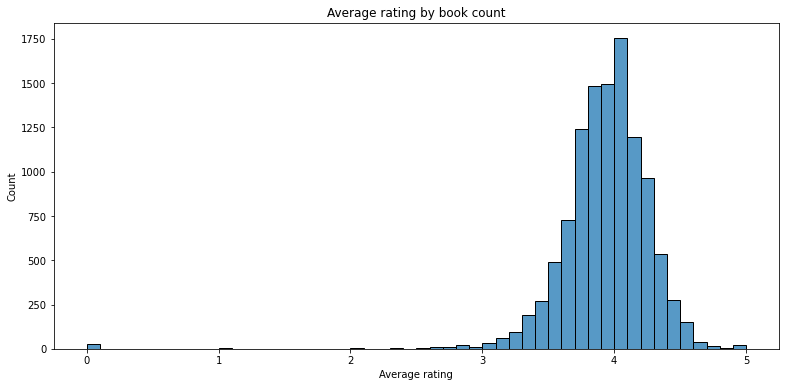

In [17]:
#  vidutinio rating pasiskirstymas

fig, ax = plt.subplots(1,1, figsize=(13,6))

sns.histplot(df['average_rating'], bins=50)

ax.set_title("Average rating by book count")
ax.set_xlabel("Average rating")
ax.set_ylabel("Count")

In [18]:
#  procentai pagal kalba
# df['language_code'].value_counts().head(5)
eng=np.round((df['language_code']=='eng').mean()*100,2)
print(f'English books takes {eng}% of all books in the dataset.')

English books takes 94.73% of all books in the dataset.


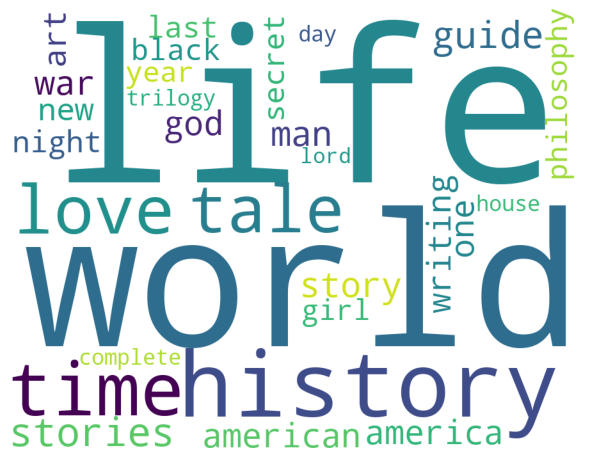

In [19]:
# wordcloud - dazniausiai pavadinime pasikartojantys zodziai

text = df.title.tolist()

comment_words = ''
stopwords =['book','volume','vol','de','la'] + list(STOPWORDS)   # zodziai, kuriu neitraukti 

for val in df['title']:
        val = str(val)     # paverciam i string
        tokens = val.split()       # isskaidom i zodzius
        for i in range(len(tokens)):       # paverciam i lowercase
            tokens[i] = tokens[i].lower() 
     
        comment_words += " ".join(tokens)+" "   # sudeda visus zodzius i viena ilga teksta

# wordcloud sukurimas
wordcloud = WordCloud(width = 900, height = 700,
                background_color ='white',
                stopwords = stopwords,
                max_words=30,
                min_font_size = 10).generate(comment_words)

# wordcloud i fig atvaizdavimas
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

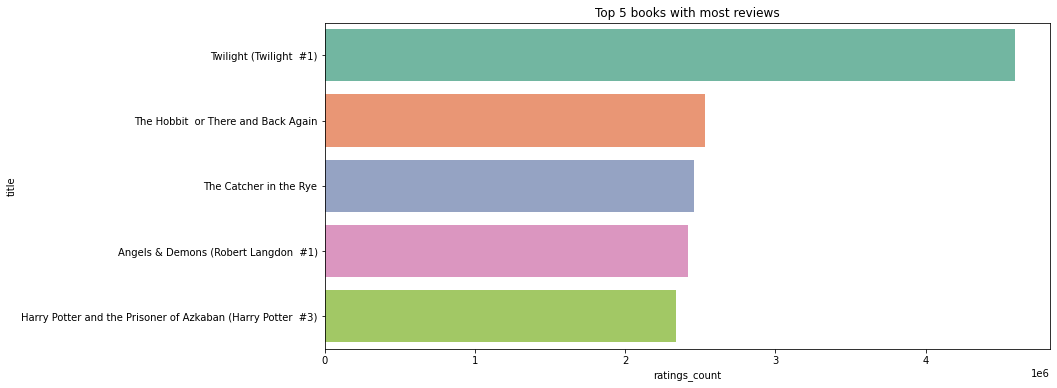

In [20]:
# daugiausiai ivertinimu surinkusios knygos

most_rated = df.sort_values('ratings_count', ascending = False).head(5)

plt.subplots(figsize=(13,6))
sns.barplot(data=most_rated,x='ratings_count',y='title',palette='Set2').set(title="Top 5 books with most reviews")
plt.show()

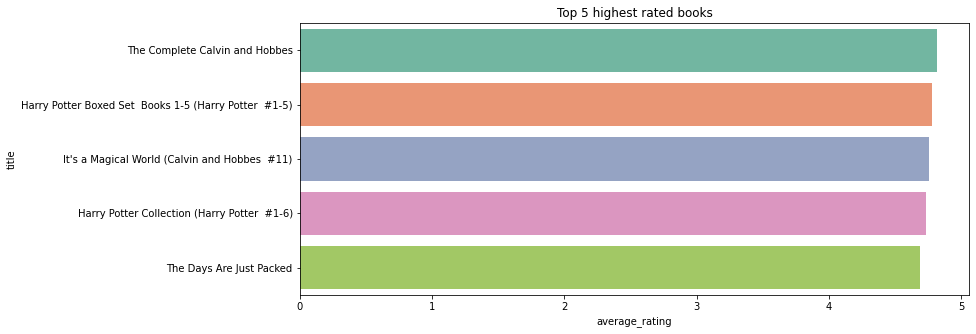

In [37]:
# geriausiai ivertinos knygos (tik kur ivertinimu skaicius didesnis uz vidutini)

high_average_rating =df[df['ratings_count'] > 17936].sort_values('average_rating', ascending = False).head(5)

plt.subplots(figsize=(12,5))
sns.barplot(data=high_average_rating,x='average_rating',y='title',palette='Set2').set(title="Top 5 highest rated books")
plt.show()

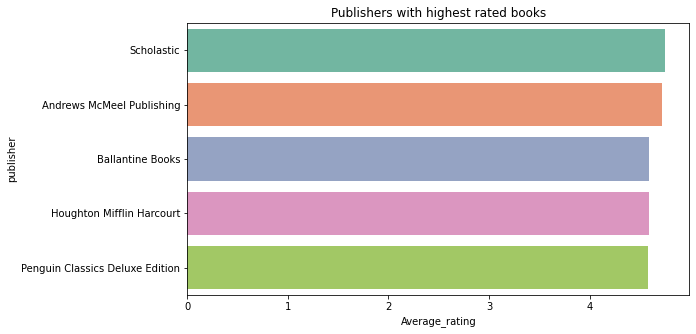

In [22]:
# geriausiai ivertinos leidejai (tik kur ivertinimu skaicius didesnis us vidutini)

publisher=df[df['ratings_count'] > 17936].sort_values('average_rating', ascending = False).head(9)

high_rated_publisher=publisher.groupby(['publisher'],as_index=False).agg( Books_total=('bookID', 'count'),
                                                             Review_count=('ratings_count','sum'),
                                                             Average_rating=('average_rating', 'mean'),).sort_values('Average_rating',ascending=False).head(10)

plt.subplots(figsize=(9,5))
sns.barplot(data=high_rated_publisher,x='Average_rating',y='publisher',palette='Set2').set(title="Publishers with highest rated books")
plt.show()

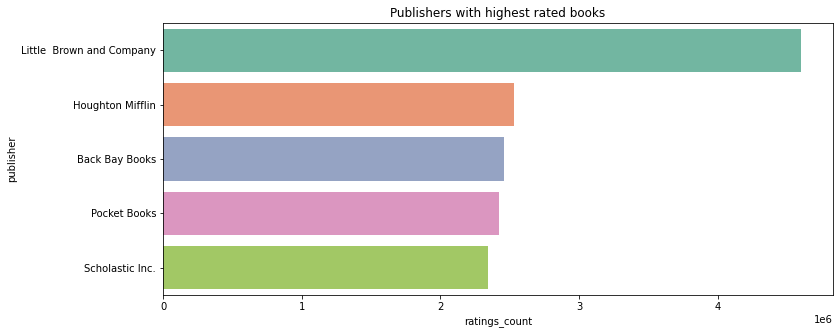

In [23]:
publisher_most=df.sort_values('ratings_count', ascending = False).head(5)
plt.subplots(figsize=(12,5))
sns.barplot(data=publisher_most,x='ratings_count',y='publisher',palette='Set2').set(title="Publishers with highest rated books")
plt.show()

In [24]:
# funkcijos isskirstyti i ivertinimu rezius

def rating_split(average_rating):
    if average_rating > 4.5:
        return "Over 4.5"
    elif average_rating > 4:
        return "Between 4-4.5"
    elif average_rating > 3.5:
        return "Between 3.5-4"
    elif average_rating > 2.5:
        return "Between 2.5-3.5"
    else:
        return "Lower than 2.5"

df['rating_range']=df['average_rating'].map(rating_split)

# funkcijos isskirstyti i puslapiu skaiciaus rezius 

def pages_split(num_pages):
    if num_pages > 700:
        return "6.Very (over 700pgs)"
    elif num_pages > 550:
        return "5.Long (over 550pgs)"
    elif num_pages > 400:
        return "4.Long (over 400pgs)"
    elif num_pages > 300:
        return "3.Average (over 300pgs)"
    elif num_pages > 200:
        return "2.Short (over 200pgs)"
    else:
        return "1.Short (less than 200pgs)"

df['pages_range']=df['num_pages'].map(pages_split)

In [25]:
pg_rating=pd.pivot_table(data = df, 
               index = 'pages_range',
               columns = 'rating_range',
               values = 'bookID',
               aggfunc = 'count').fillna(0).sort_values('pages_range')

In [26]:
pg_rating

rating_range,Between 2.5-3.5,Between 3.5-4,Between 4-4.5,Lower than 2.5,Over 4.5
pages_range,,,,,
1.Short (less than 200pgs),242.0,1422.0,1191.0,15.0,80.0
2.Short (over 200pgs),219.0,1458.0,920.0,13.0,26.0
3.Average (over 300pgs),185.0,1449.0,880.0,7.0,17.0
4.Long (over 400pgs),64.0,828.0,723.0,1.0,22.0
5.Long (over 550pgs),22.0,268.0,373.0,0.0,10.0
6.Very (over 700pgs),22.0,175.0,459.0,2.0,34.0


<AxesSubplot:xlabel='rating_range', ylabel='pages_range'>

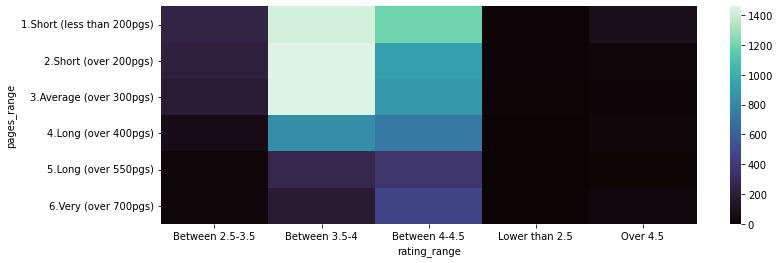

In [27]:
# knygu skaicius pagal puslapiu skaiciu ir rating
plt.subplots(figsize=(12,4))
sns.heatmap(pg_rating,cmap='mako')

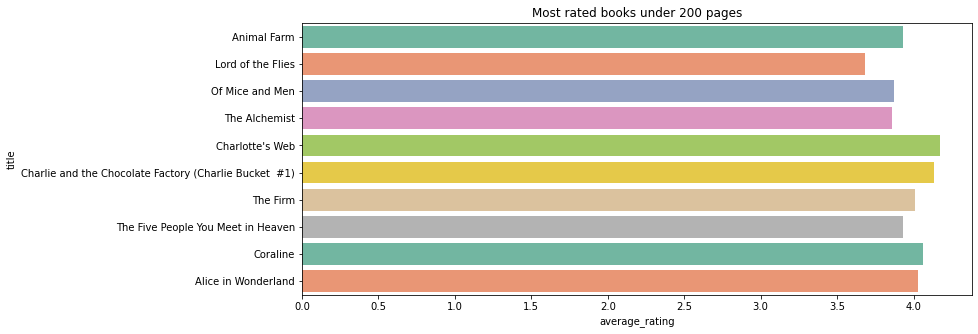

In [28]:
# isfiltruoja knygas su maziau nei 200 psl ir isrusiuoja pagal reiktingu skaiciu
under_200 = df[df['num_pages'] <= 200]
top_short = under_200.sort_values('ratings_count',ascending=False).head(10)

plt.subplots(figsize=(12,5))
sns.barplot(x='average_rating', y='title', data=top_short,palette='Set2').set(title="Most rated books under 200 pages")
plt.show()

In [29]:
# top rasytojai pagal knygu skaiciu su vidutiniu rating

most_books=df.groupby(('authors'),as_index=False).agg(Books_total=('bookID', 'count'),
                         Average_rating=('average_rating', 'mean'),
                        ratings_count_avg=('ratings_count','mean')).sort_values('Books_total',ascending=False).head(30)

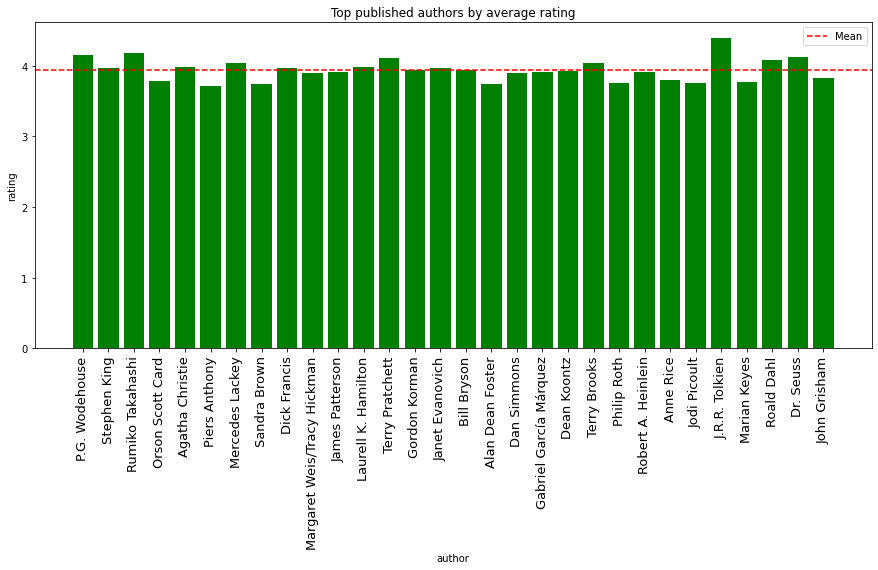

In [30]:
# istraukti kintamieji
author=most_books['authors']
rating=most_books['Average_rating']

fig,ax = plt.subplots(figsize=(15,6))

# bar chart sukurimas
plt.bar(author,rating,color ='green', width = 0.8)

# vidutinio ivertinimo linija
plt.axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')
plt.xticks(rotation=90, fontsize=13)
legend = ax.legend(loc='upper right')

plt.title('Top published authors by average rating')
plt.xlabel('author')
plt.ylabel('rating')

plt.show()

In [31]:
least_books=df.groupby(('authors'),as_index=False).agg(Books_total=('bookID', 'count'),
                         Average_rating=('average_rating', 'mean')).sort_values('Books_total')
filter=least_books['Books_total']<2

least_books=least_books[filter]

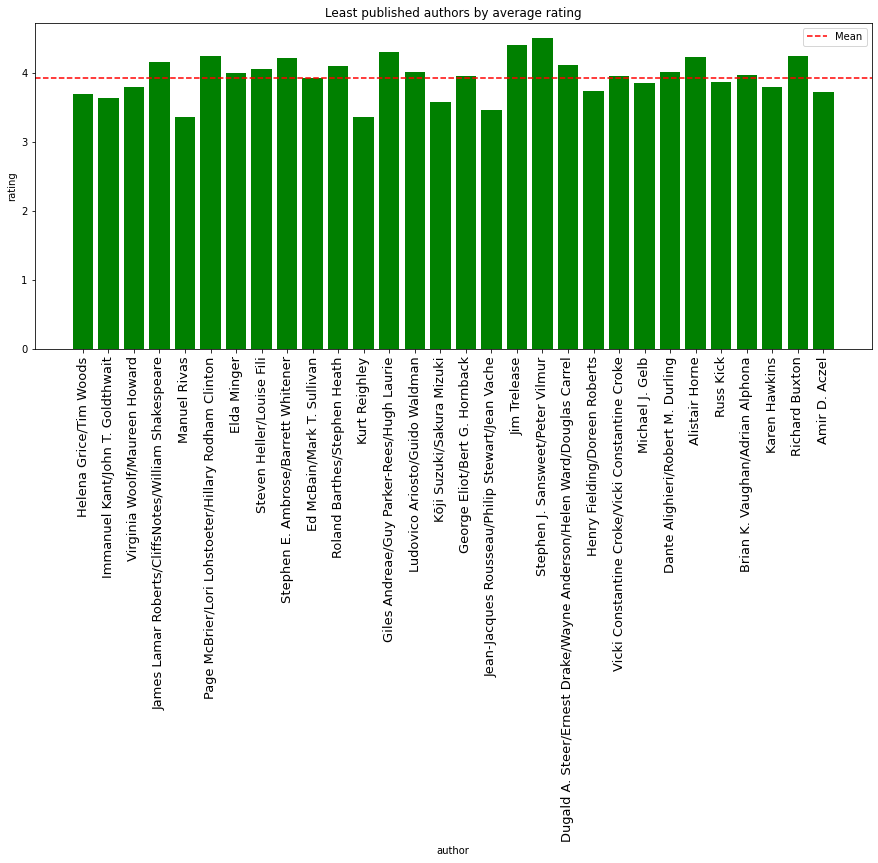

In [46]:
# istraukti kintamieji
sample_least=least_books.sample(30)  # sample, nes autoriu parasiusiu po 1 knyga yra virs 5k
author=sample_least['authors']
rating=sample_least['Average_rating']

fig,ax = plt.subplots(figsize=(15,6))

# bar chart sukurimas
plt.bar(author,rating,color ='green', width = 0.8)

# vidutinio ivertinimo linija
plt.axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')
plt.xticks(rotation=90,fontsize=13)
legend = ax.legend(loc='upper right')

plt.title('Least published authors by average rating')
plt.xlabel('author')
plt.ylabel('rating')

plt.show()

Text(17.200000000000017, 0.5, 'Authors')

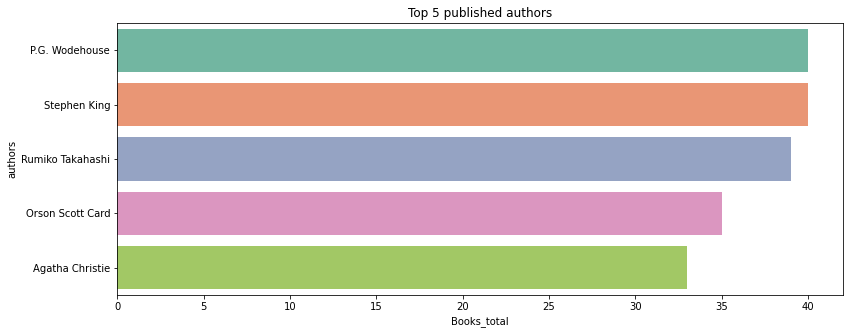

In [33]:
author_of_most_books =most_books.head(5)

plt.subplots(figsize=(13,5))
sns.barplot(x = author_of_most_books['Books_total'], y = author_of_most_books['authors'], palette='Set2').set(title='Top 5 published authors')
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=0.7)

In [34]:
filter3=df['authors'].isin(author_of_most_books['authors'])
df_top=df[filter3]

PG_W_filter=df_top['authors']=='P.G. Wodehouse'
PG_W=df_top[PG_W_filter]
S_K_filter=df_top['authors']=='Stephen King'
S_K=df_top[S_K_filter]
R_T_filter=df_top['authors']=='Rumiko Takahashi'
R_T=df_top[R_T_filter]
O_S_C_filter=df_top['authors']=='Orson Scott Card'
O_S_C=df_top[O_S_C_filter]
A_C_filter=df_top['authors']=='Agatha Christie'
A_C=df_top[A_C_filter]

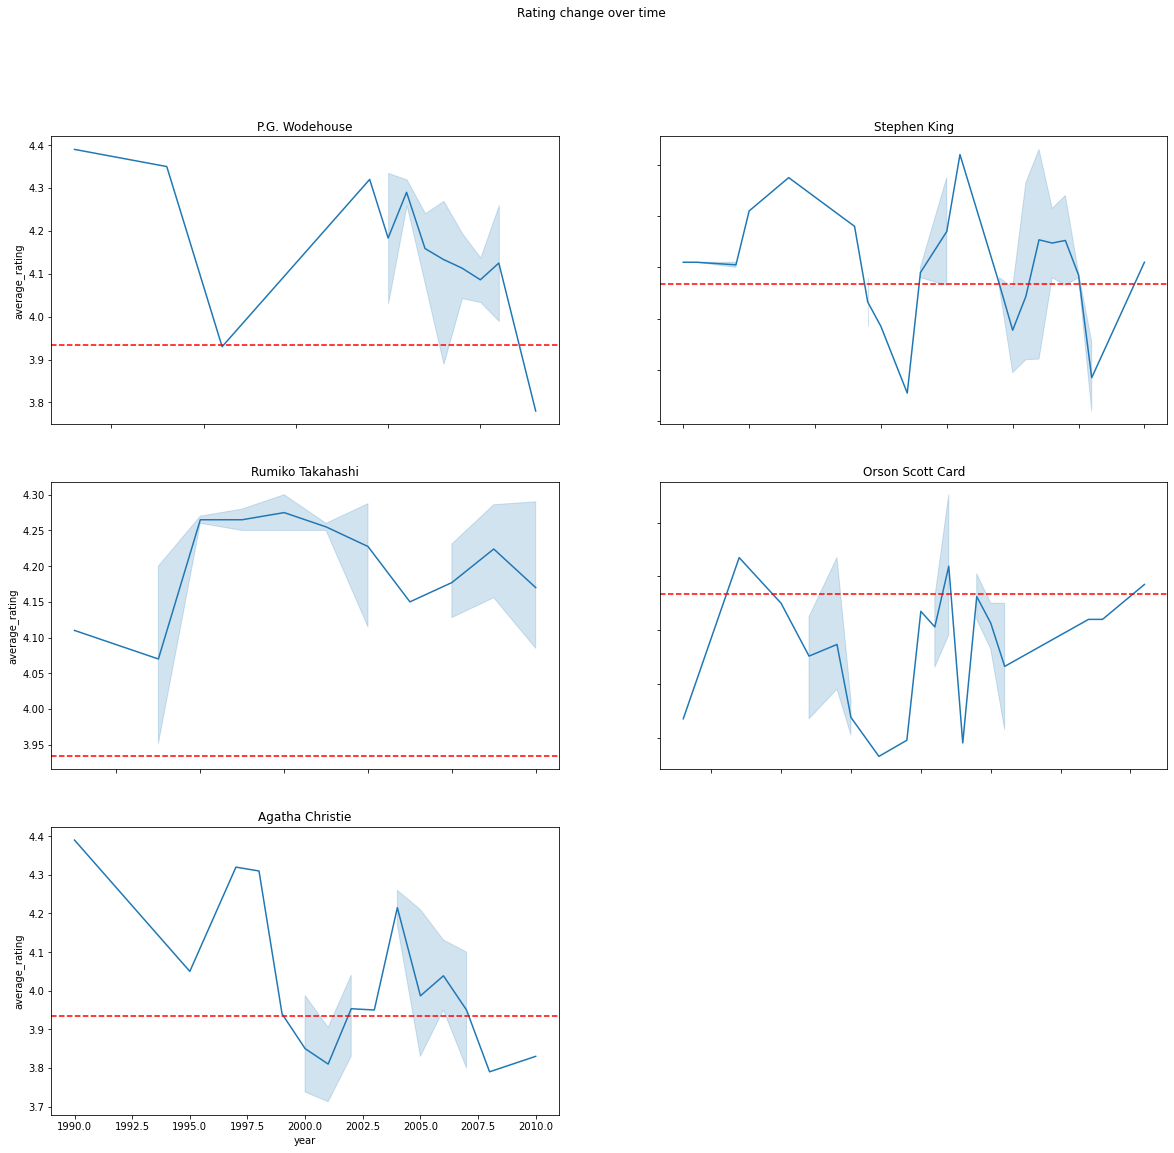

In [42]:
# autoriu parasiusiu daugiausiai knygu rating pokytis per metus
fig, axs = plt.subplots(3,2, figsize=(20, 18))
fig.suptitle('Rating change over time')
axs[2,1].set_visible(False)

sns.lineplot( x = PG_W["year"],y = PG_W["average_rating"],ax=axs[0,0]).set_title("P.G. Wodehouse")
l=axs[0,0].axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')

sns.lineplot( x = S_K["year"],y = S_K["average_rating"], ax=axs[0,1]).set_title("Stephen King")
l=axs[0,1].axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')

sns.lineplot( x = R_T["year"],y = R_T["average_rating"],ax=axs[1,0]).set_title("Rumiko Takahashi")
l=axs[1,0].axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')

sns.lineplot( x = O_S_C["year"],y = O_S_C["average_rating"],ax=axs[1,1]).set_title("Orson Scott Card")
l=axs[1,1].axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')

sns.lineplot( x = A_C["year"],y = A_C["average_rating"],ax=axs[2,0]).set_title("Agatha Christie")
l=axs[2,0].axhline(y=df['average_rating'].mean(), color='red',label='Mean', linestyle='--')

for ax in axs.flat:
    ax.label_outer()

## Conclusion

Most published authors tend to be more than total average rating, but there is no visible trend that books get better over time.